In [144]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [145]:
#한글 깨짐 방지
from matplotlib import rc, font_manager
font_path='../data/fonts/malgun.ttf'
font_name=font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)
#마이너스 깨짐 방지
plt.rcParams['axes.unicode_minus']=False

# 가격 상관분석

가격&생산량 데이터 불러오기

In [146]:
# 데이터 불러오기
mackerel_price=pd.read_csv('../data/mackerel/mackerel_price_interpolate.csv')
mackerel_output=pd.read_csv('../data/mackerel/부산_고등어_생산량(선어).csv',encoding='cp949')
# merge
mackerel=pd.merge(mackerel_price,mackerel_output,on=['년도','월'])
mackerel
# mackerel=pd.merge(temperature,mackerel,on=['년도','월'])
# mackerel.to_csv('./data/merge/mackerel_total.csv',index=False)

,년도,월,가격 (원),생산량
0,2008,1,2373.0,7994
1,2008,2,2413.0,1430
2,2008,3,2436.0,3001
3,2008,4,2510.0,1385
4,2008,5,2511.0,582
...,...,...,...,...
187,2023,8,2932.0,5698
188,2023,9,2875.0,9903
189,2023,10,2489.0,9163
190,2023,11,2649.0,11462


In [147]:
mackerel=mackerel[mackerel['월']==7]
mackerel=mackerel.reset_index().drop(columns='index')
mackerel.iloc[:,2:].corr()

,가격 (원),생산량
가격 (원),1.000000,-0.421944
생산량,-0.421944,1.000000


In [148]:
# 데이터 표준화
scaler_x=StandardScaler()
scaler_x.fit_transform(mackerel.iloc[:,2:])
test=scaler_x.transform(mackerel.iloc[:,2:])
mackerel_standard=pd.DataFrame(test)

### 생산량 및 가격 연평균 추이

In [149]:
mackerel_standard

,0,1
0,-0.883064,-0.290990
1,-1.005959,-0.329223
2,0.193263,-0.965234
3,1.741350,-1.033154
4,0.137762,1.274301
5,1.406361,-0.220822
6,1.218053,-0.196983
7,0.098118,0.438579
8,-0.988120,-0.086783
9,-0.843420,0.624345


In [150]:
mackerel_standard.rename(columns={0:'가격 (원)',1:'생산량'}, inplace=True)
mackerel_standard

,가격 (원),생산량
0,-0.883064,-0.290990
1,-1.005959,-0.329223
2,0.193263,-0.965234
3,1.741350,-1.033154
4,0.137762,1.274301
5,1.406361,-0.220822
6,1.218053,-0.196983
7,0.098118,0.438579
8,-0.988120,-0.086783
9,-0.843420,0.624345


In [151]:
mackerel_standard['년도']=mackerel['년도']
mackerel_standard['월']=mackerel['월']
mackerel_standard

,가격 (원),생산량,년도,월
0,-0.883064,-0.290990,2008,7
1,-1.005959,-0.329223,2009,7
2,0.193263,-0.965234,2010,7
3,1.741350,-1.033154,2011,7
4,0.137762,1.274301,2012,7
5,1.406361,-0.220822,2013,7
6,1.218053,-0.196983,2014,7
7,0.098118,0.438579,2015,7
8,-0.988120,-0.086783,2016,7
9,-0.843420,0.624345,2017,7


### 생산량 및 가격 월별 평균 추이

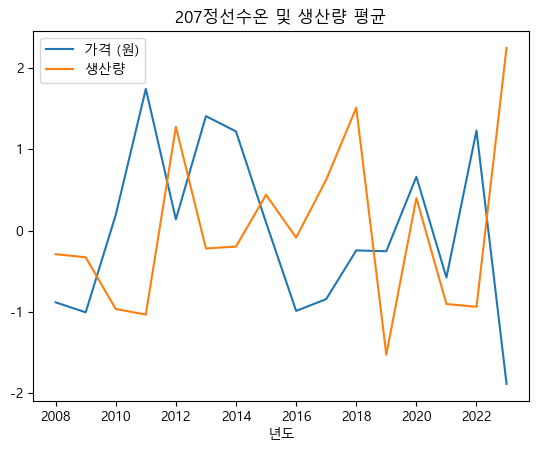

In [152]:
# 생산량 및 가격
plt.figure()


plt.title('207정선수온 및 생산량 평균')
plt.xlabel('년도')
plt.plot(mackerel_standard['년도'],mackerel_standard['가격 (원)'],label='가격 (원)')
plt.plot(mackerel_standard['년도'],mackerel_standard['생산량'],label='생산량')
plt.legend()
plt.show()

#### 수입량 데이터 불러오기

In [153]:
mackerel_import_quantity = pd.read_csv("../data/mackerel/국가별 고등어 수입 물량(kg).csv", encoding='cp949')
# '국가' 열을 기준으로 그룹화하여 각 국가별로 수출물량 합산
mackerel_import_quantity = mackerel_import_quantity.groupby('국가').sum()
# '구분' 열 삭제
mackerel_import_quantity = mackerel_import_quantity.drop(columns='구분')
# 데이터를 숫자형으로 변환
mackerel_import_quantity = mackerel_import_quantity.apply(pd.to_numeric, errors ='ignore')
# 합계 열 추가
mackerel_import_quantity['합계'] = mackerel_import_quantity.sum(axis=1)
# 합계 열 기준 내림차순 정렬
mackerel_import_quantity = mackerel_import_quantity.sort_values(by='합계', ascending=False)
mackerel_import_quantity.iloc[:,:-1]


,2015,2016,2017,2018,2019,2020,2021,2022,2023
국가,,,,,,,,,
노르웨이,36160118,38765235,36518692,36812100,34876470,36400226,45212330,49312434,51305747
중국,9290431,2788194,2058661,2346076,5645192,3041401,4298540,2734252,4191905
러시아,0,0,66166,23772,0,5440089,3120125,1217500,33598
페루,0,1740000,4687500,25660,0,0,0,0,0
대만,3300180,95350,0,707680,0,125550,152910,0,1352314
영국,1460001,686660,628800,240002,336000,1,120000,1284200,144000
네덜란드,192000,202788,218093,416906,817034,25588,278898,352155,589125
베트남,209890,150308,169295,292788,321920,378909,207718,280700,308372
태국,87631,28308,74172,115419,167940,207048,87253,65490,275857
